In [1]:
import pickle
import sys
sys.path.append("./bin/")
sys.path.append(".")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
sys.path.append("../bin/")
sys.path.append(".")

In [3]:
import scipy 
import scipy.sparse.linalg as sprsla
from hamiltonians import NNHamiltonian
from randomizer import RandomizerHamiltonianNNRandomDelta, RandomizerStateRandomDelta
from stability_analysis_class import StabilityAnalysisSparse
from tools import SijCalculator
from exact_diagonalisation_code_sparse import create_sx_sparse, create_sy_sparse, create_sz_sparse
from math import sqrt, pi

In [4]:
# 1) SET VALUES FOR INPUTS:

L=6                                       # <-- Dimer
h = [[0, 0, 0]]                            # <-- No applied field
J_onsite = np.zeros((3, 3))                # <-- No onsite interactions (superfluous anyway)
J_nnn = np.zeros((3, 3))                   # <-- No nnn interactions
J_nn = [[1.2, 0, 0], [0, 0.8, 0], [0, 0, 0]]   # <-- Diagonal nn interactions

# 2) CREATE THE HAMILTONIAN: 

HAMILTONIAN = NNHamiltonian(L, h, J_onsite, J_nn, J_nnn, temp=0.1)

In [37]:
delta= 0.0
no_of_processes= 1
RANDOMIZER = RandomizerStateRandomDelta(HAMILTONIAN, delta, no_of_processes)

corr = ["Sxx", "Sxy", "Sxz", "Syx", "Syy", "Syz", "Szx", "Szy", "Szz"]
temp= HAMILTONIAN.temp  # <-- Obtain temperature from the Hamiltonian setup
save_rhams= "False"     # <-- Do not save random Hamiltonians/states
temp_type= "value"      # <-- Temperature given explicitly

STABILITY_ANALYSIS = StabilityAnalysisSparse(HAMILTONIAN, RANDOMIZER, corr, save_rhams,temp_mul=temp, temp_type=temp_type)

no_of_samples= 1
dist, en, diffSij, diffSq, Sqs, Sijs, Sqints, Sq_int=STABILITY_ANALYSIS.generate_random_Sij_sparse(no_of_samples)

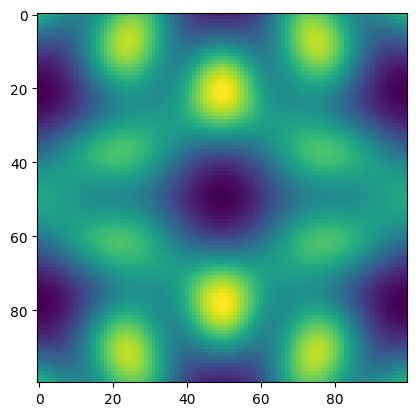

In [38]:
plt.imshow(STABILITY_ANALYSIS.Sq_int_in)
plt.show()